In [3]:
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

import pandas as pd
import pandas_datareader as web

In [4]:
df = web.DataReader('6888.KL', data_source='yahoo', start='2011-05-12',end='2020-05-12')
df.to_csv('stock5.csv')
df = pd.read_csv('stock5.csv')

In [5]:
df = df.set_index('Date')

# Analysis 

In [40]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,New
Date,,,,,,,
2020-03-06,4.07,3.98,4.07,4.00,5792100.0,4.00,0.07
2020-03-09,4.03,3.90,3.97,3.98,4610400.0,3.98,-0.01
2020-03-10,4.06,3.94,3.94,3.99,9702500.0,3.99,-0.05
2020-03-11,4.02,3.94,3.99,3.96,8149700.0,3.96,0.03
2020-03-12,3.96,3.93,3.95,3.94,6903700.0,3.94,0.01


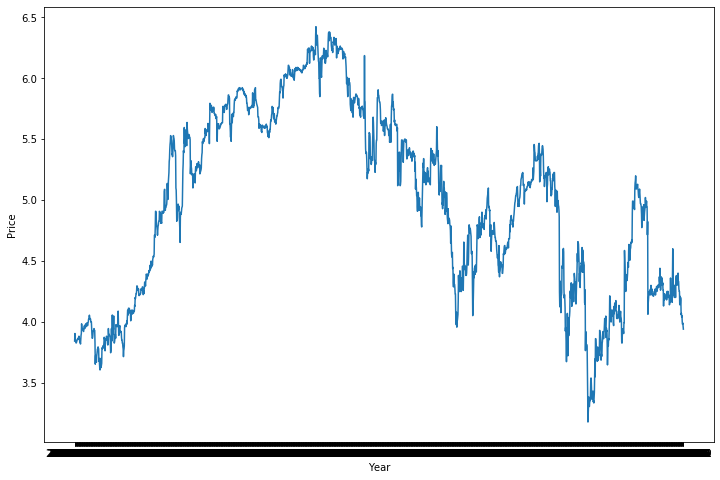

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize = (12,8))
plt.plot(df['Adj Close'])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [8]:
df['New']=df['Open']-df['Close']
max(df['New'])

0.5799999237060551

In [9]:
min(df['New'])

-0.509999752044676

In [10]:
df['New'].idxmin(axis = 1, skipna = True)

'2015-08-03'

In [11]:
df['New'].idxmax(axis = 1, skipna = True)

'2018-10-10'

# Train

In [12]:
df2=[]
df2 = df[['Adj Close']] 

print(df2.head())

            Adj Close
Date                 
2011-05-12   3.842375
2011-05-13   3.904225
2011-05-16   3.857837
2011-05-18   3.842375
2011-05-19   3.850106


In [13]:
forecast_out = 30
df2['Prediction'] = df2[['Adj Close']].shift(-forecast_out)

print(df2.head())

            Adj Close  Prediction
Date                             
2011-05-12   3.842375    3.936249
2011-05-13   3.904225    3.928361
2011-05-16   3.857837    3.920472
2011-05-18   3.842375    3.944138
2011-05-19   3.850106    3.952026


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
X = np.array(df2.drop(['Prediction'], 1))
len(X)

2183

In [15]:
#reserving 60 data for testing
X_new = X[0:2123]
len(X_new) + 60

2183

In [16]:
X_new[0:10]

array([[3.84237504],
       [3.90422487],
       [3.8578372 ],
       [3.84237504],
       [3.85010648],
       [3.82691312],
       [3.82691312],
       [3.83464408],
       [3.84237504],
       [3.85010648]])

In [17]:
y = np.array(df2['Prediction'])
y_new = y[:-60]
len(y_new)

2123

In [18]:
y_new[0:10]

array([3.93624878, 3.9283607 , 3.92047215, 3.94413781, 3.95202613,
       3.96780252, 3.94413781, 3.95202613, 3.97568941, 3.95991349])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2)

In [20]:
y = np.array(df2['Prediction'])
y = y[:-forecast_out]
print(y)
len(y)

[3.93624878 3.9283607  3.92047215 ... 3.99000001 3.96000004 3.94000006]


2153

## Prediction

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pre = lr.predict(X[2153:2183])
print("Predicted last 30 days")
print(y_pre)

Predicted last 30 days
[4.37214592 4.28156603 4.41743544 4.43555133 4.44460949 4.41743544
 4.37214592 4.43555133 4.4264936  4.44460949 4.46272538 4.39931955
 4.39931955 4.34497187 4.32685598 4.32685598 4.22721836 4.29062419
 4.23627652 4.28156603 4.26345014 4.15475479 4.16381295 4.1366389
 4.14569706 4.10040711 4.08229122 4.09134917 4.06417533 4.04605944]


In [23]:
confidence = lr.score(X_test, y_test)
print("Confidence Score: ", confidence)

Confidence Score:  0.849966092481015


In [24]:
x_forecast = np.array(df2.drop(['Prediction'], 1))[-forecast_out:]
print("Actual last 30 days: ")
print(x_forecast)

Actual last 30 days: 
[[4.30000019]
 [4.19999981]
 [4.3499999 ]
 [4.36999989]
 [4.38000011]
 [4.3499999 ]
 [4.30000019]
 [4.36999989]
 [4.36000013]
 [4.38000011]
 [4.4000001 ]
 [4.32999992]
 [4.32999992]
 [4.26999998]
 [4.25      ]
 [4.25      ]
 [4.13999987]
 [4.21000004]
 [4.1500001 ]
 [4.19999981]
 [4.17999983]
 [4.05999994]
 [4.07000017]
 [4.03999996]
 [4.05000019]
 [4.        ]
 [3.98000002]
 [3.99000001]
 [3.96000004]
 [3.94000006]]


Text(0, 0.5, 'Price')

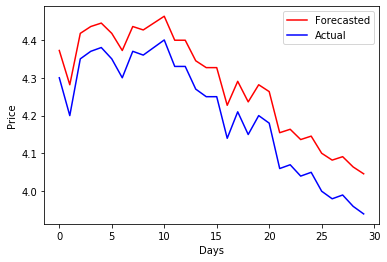

In [25]:
plt.plot(y_pre, color='r')
plt.plot(x_forecast, color='b')
plt.legend(['Forecasted', 'Actual'])
plt.xlabel("Days")
plt.ylabel("Price")

In [26]:
print("Mean Squared Error: ", mean_squared_error(y_pre, x_forecast))

Mean Squared Error:  0.006762122421861641


In [27]:
y_pre2 = [] 
y_pre2.append(np.array(y_pre))
for x in range(11):
    y_pre_alt = y_pre2[x]
    y_pre_in = lr.predict(y_pre_alt.reshape(-1, 1))
    y_pre2.append(np.array(y_pre_in))

In [28]:
forward = []
for x in y_pre2:
    for y in x:
        forward.append(y)

print(y_pre2)
print(forward)

[array([4.37214592, 4.28156603, 4.41743544, 4.43555133, 4.44460949,
       4.41743544, 4.37214592, 4.43555133, 4.4264936 , 4.44460949,
       4.46272538, 4.39931955, 4.39931955, 4.34497187, 4.32685598,
       4.32685598, 4.22721836, 4.29062419, 4.23627652, 4.28156603,
       4.26345014, 4.15475479, 4.16381295, 4.1366389 , 4.14569706,
       4.10040711, 4.08229122, 4.09134917, 4.06417533, 4.04605944]), array([4.4374952 , 4.35544835, 4.47851824, 4.49492753, 4.50313237,
       4.47851824, 4.4374952 , 4.49492753, 4.48672308, 4.50313237,
       4.51954166, 4.46210894, 4.46210894, 4.41288107, 4.39647177,
       4.39647177, 4.30622047, 4.36365319, 4.31442531, 4.35544835,
       4.33903905, 4.2405833 , 4.24878814, 4.22417401, 4.23237885,
       4.19135542, 4.17494613, 4.18315077, 4.15853684, 4.14212754]), array([4.49668828, 4.42237061, 4.53384676, 4.54871022, 4.55614213,
       4.53384676, 4.49668828, 4.54871022, 4.54127867, 4.55614213,
       4.57100559, 4.5189833 , 4.5189833 , 4.47439291, 4.

In [37]:
xxx = np.append(X[1889:], forward)

Text(0, 0.5, 'Price')

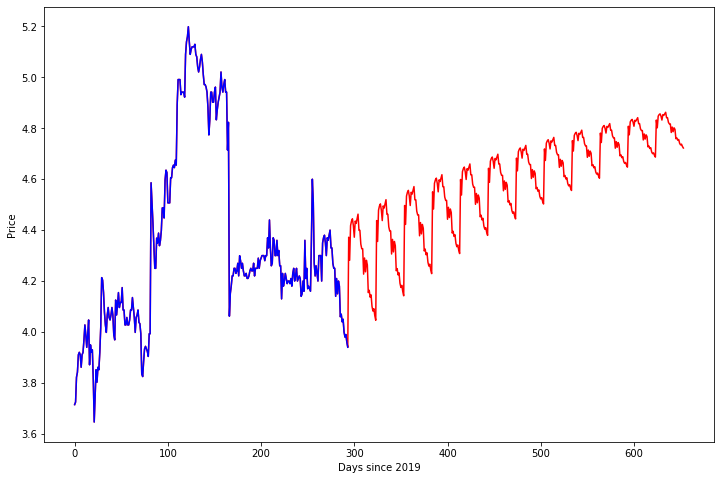

In [39]:
#The stock prices predicted from 1 day into the future, to a year into the future
plt.figure(figsize = (12,8))
plt.plot(xxx, color='r')
plt.plot(X[1889:], color='b')
plt.xlabel("Days since 2019")
plt.ylabel("Price")